In [10]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm



%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats

marigold = pd.read_excel('DOE_P.xlsx', 
                             sheet_name='Anova_3',header=0)
marigold

,height,experimental_model,Replicate
0,33.50,M1,R1
1,25.30,M1,R2
2,30.50,M1,R3
3,31.60,M1,R4
4,26.20,M1,R5
5,26.70,M1,R6
6,24.90,M1,R7
7,27.70,M1,R8
8,31.60,M1,R9
9,26.70,M1,R10


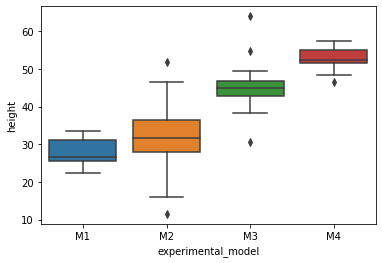

In [2]:
sns.boxplot(x='experimental_model',y='height',data=marigold);

In [3]:
# Compute variables
a = len(marigold["experimental_model"].unique())
b = len(marigold.Replicate.unique())
total_y = sum(marigold.height)
SST = sum(marigold.height**2) - (total_y**2)/(a*b) 

# Compute SS terms
yi_dot = marigold.groupby('experimental_model').aggregate({'height':'sum'}).height
SSTr = sum(yi_dot**2)/b - (total_y**2)/(a*b)
ydot_j = marigold.groupby('Replicate').aggregate({'height':'sum'}).height
SSB = sum(ydot_j**2)/a - (total_y**2)/(a*b)
SSE = SST - SSB - SSTr 
print("SST = {:.3f}, SSTr = {:.3f}, SSB = {:.3f}, SSE = {:.3f}".format(SST, SSTr, SSB, SSE))

# Compute MS Terms
MSTr = SSTr/(a-1)
MSB = SSB/(b-1)
MSE = SSE/((a-1)*(b-1))
F0 = MSTr/MSE
p_value = stats.f.sf(F0, a-1,(a-1)*(b-1))
print("MSTr = {0:.3f}, MSE = {1:.3f}, F0 = {2:.3f}, P-value = {3:.3f}".format(MSTr, MSE, F0, p_value))

SST = 8770.665, SSTr = 6207.254, SSB = 849.149, SSE = 1714.262
MSTr = 2069.085, MSE = 40.816, F0 = 50.693, P-value = 0.000


In [12]:
from statsmodels.formula.api import ols # Require patsy version 5.0.1+ 
from statsmodels.stats.anova import anova_lm

mod = ols('height ~ experimental_model + Replicate', marigold).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

                      df       sum_sq      mean_sq          F        PR(>F)
experimental_model   3.0  6207.253833  2069.084611  50.693281  5.147449e-14
Replicate           14.0   849.149033    60.653502   1.486032  1.587417e-01
Residual            42.0  1714.261767    40.815756        NaN           NaN


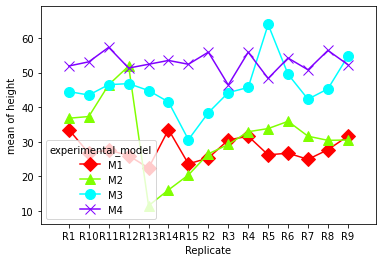

In [5]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(marigold.Replicate, 
                       marigold.experimental_model, 
                       marigold.height, 
                       markers=['D','^','o','x'], ms=10) 

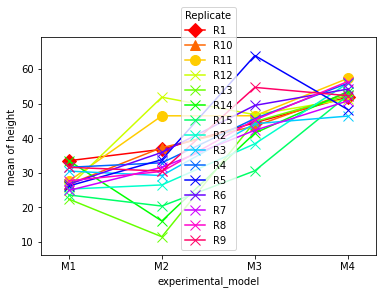

In [6]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(marigold.experimental_model, 
                       marigold.Replicate, 
                       marigold.height, 
                       markers=['D','^','o','x','x','x','x','x','x','x','x','x','x','x','x'], ms=10) 

In [8]:
def check_anova_normality(group, x):

    kws = dict(color='blue', marker='o', markersize=7, alpha=0.5)
    sns1_kws = dict(color='blue', marker='o', s=80, alpha=0.5)
    sns2_kws = dict(marker='o', s=8, alpha=0.5)

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, ax=ax1, scatter_kws=sns1_kws) # color='blue', ax=ax1, scatter_kws=sns1_kws)
    #sns.scatterplot(np.linspace(1,n,n), x, ax=ax1, **sns1_kws) 
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2, **sns2_kws) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=True)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')


    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4, **kws)
    ax4.set_title('Q-Q plot')
    plt.tight_layout()

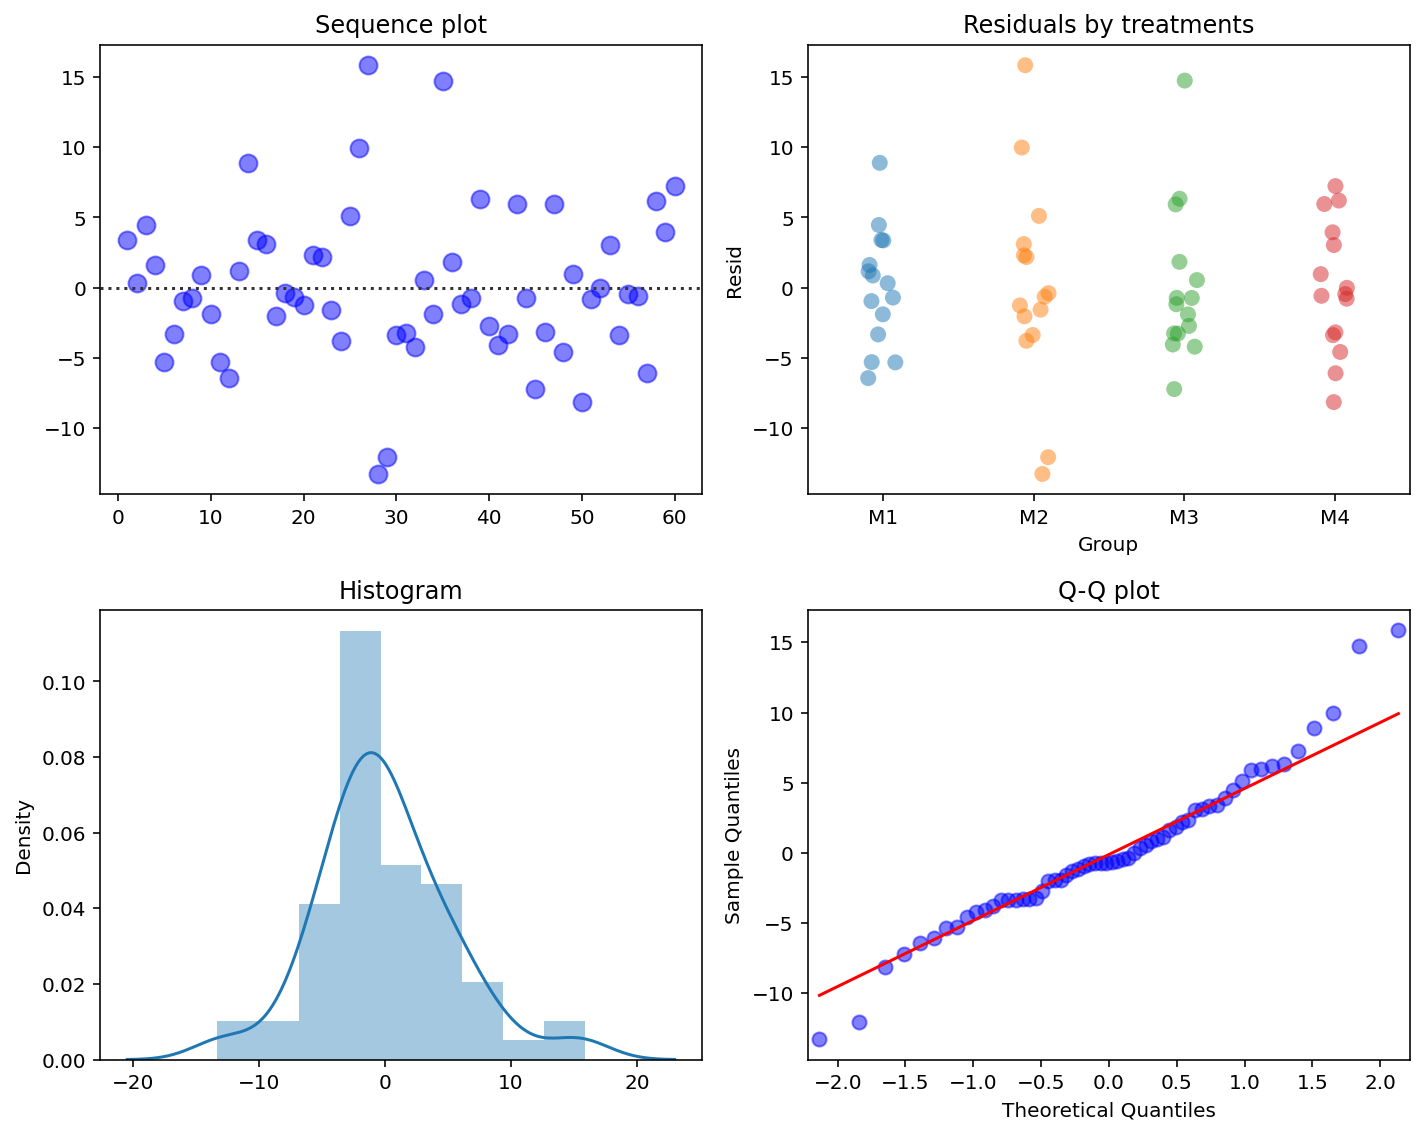

In [11]:
check_anova_normality(marigold['experimental_model'], mod.resid)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    M1     M2     3.56 0.4804 -2.9819 10.1019  False
    M1     M3  17.6267  0.001 11.0848 24.1685   True
    M1     M4  24.9533  0.001 18.4115 31.4952   True
    M2     M3  14.0667  0.001  7.5248 20.6085   True
    M2     M4  21.3933  0.001 14.8515 27.9352   True
    M3     M4   7.3267 0.0224  0.7848 13.8685   True
----------------------------------------------------


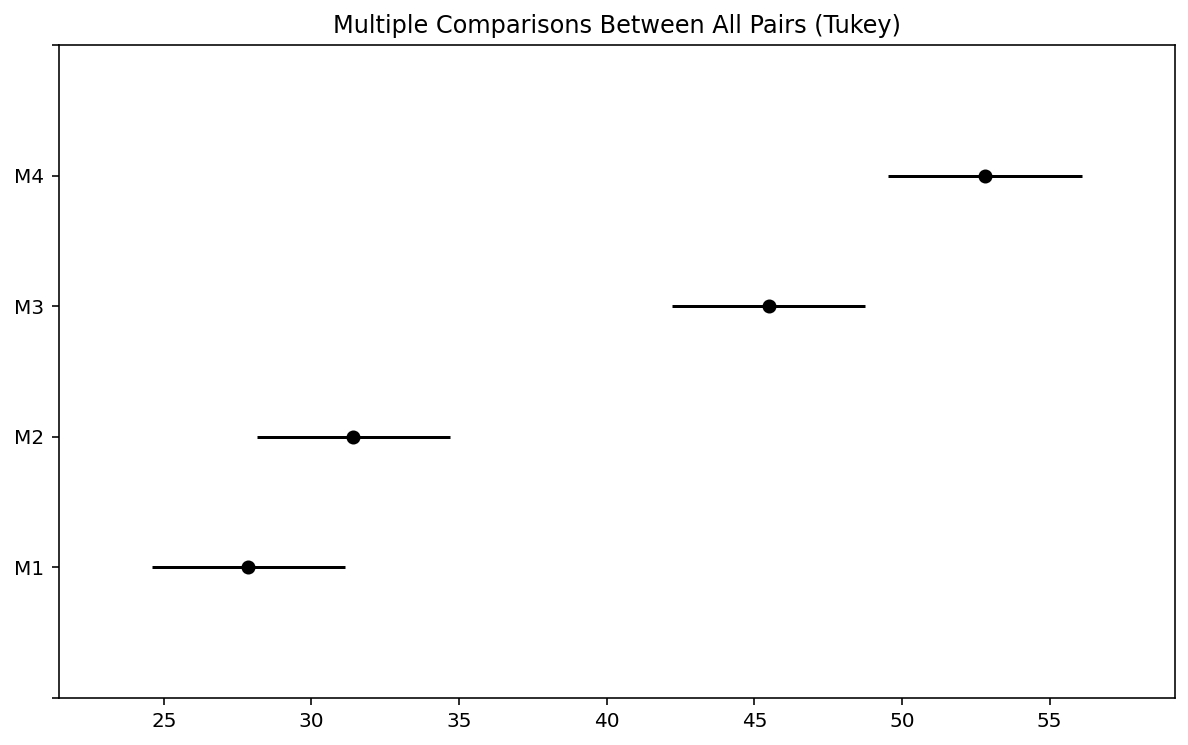

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# alpha = Family-wise error rate
result=pairwise_tukeyhsd(marigold['height'],marigold['experimental_model'],alpha=0.05)
print(result)
result.plot_simultaneous();    # Plot confidence intervals of all sample means
#plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")